<a href="https://colab.research.google.com/github/mdkurashin/Portfolio/blob/main/bank_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests, zipfile, io

In [ ]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [ ]:
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

In [ ]:
df = pd.read_csv(z.open('bank-full.csv'), sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#меняем тип переменной
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int32

In [ ]:
#группируем для графика
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766
5,6,5341
6,7,6895
7,8,6247
8,9,579
9,10,738


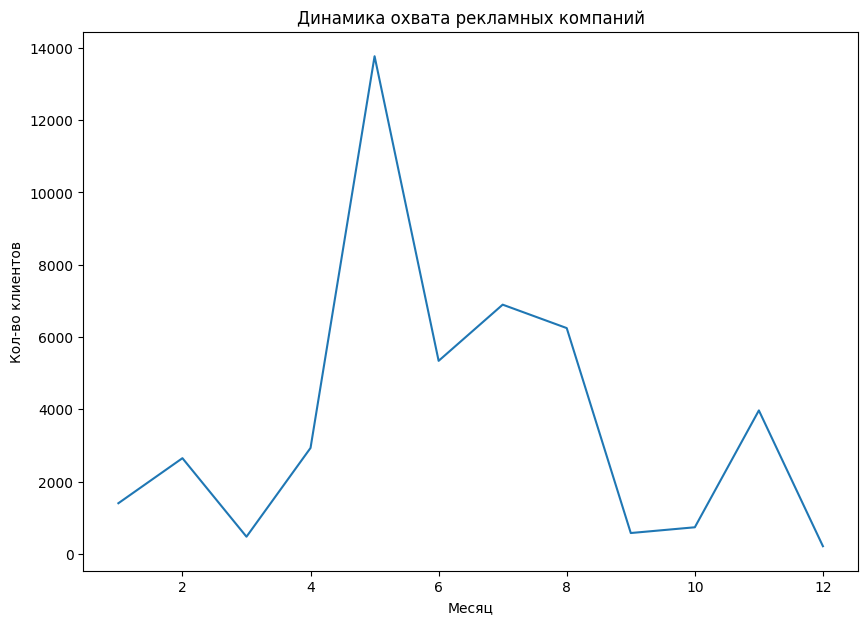

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(data['month'], data['count'])
plt.title('Динамика охвата рекламных компаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');


In [ ]:
data1 = df[df['marital'] == 'single'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data2 = df[df['marital'] == 'married'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

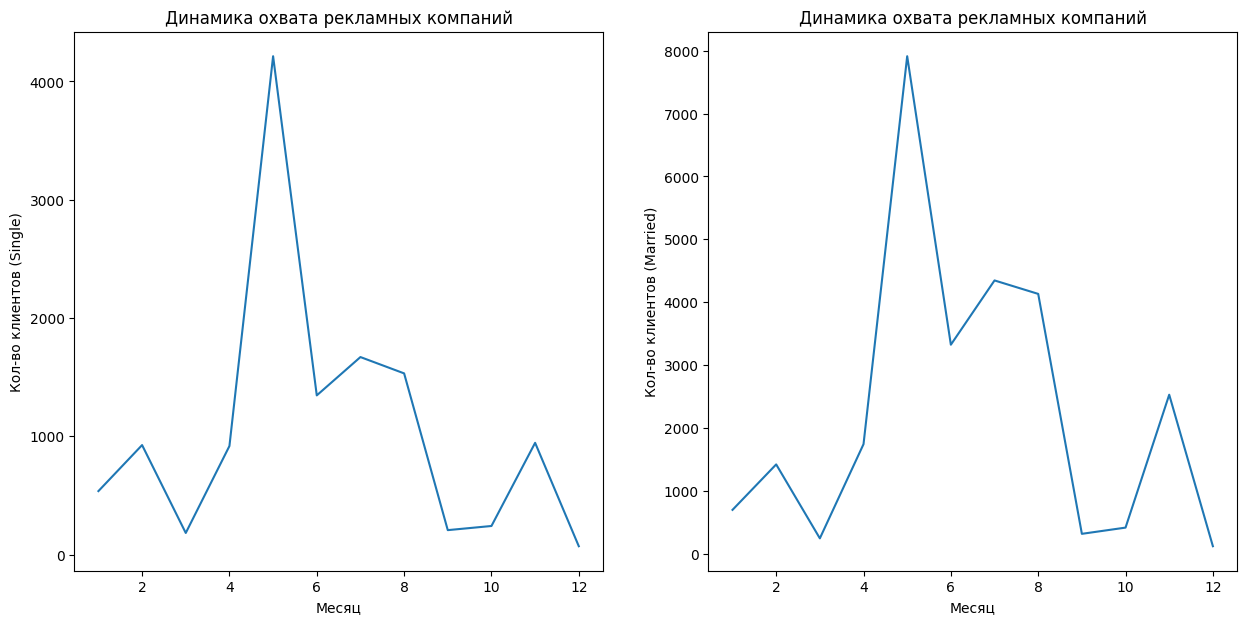

In [ ]:
#два линейных графика по группированным данным выше

fig, ax = plt.subplots(1, 2, figsize=(15,7))
ax[0].plot(data1['month'],data1['count'])
ax[0].set_title('Динамика охвата рекламных компаний')
ax[0].set_xlabel('Месяц')
ax[0].set_ylabel('Кол-во клиентов (Single)')

ax[1].plot(data2['month'],data2['count'])
ax[1].set_title('Динамика охвата рекламных компаний')
ax[1].set_xlabel('Месяц')
ax[1].set_ylabel('Кол-во клиентов (Married)');

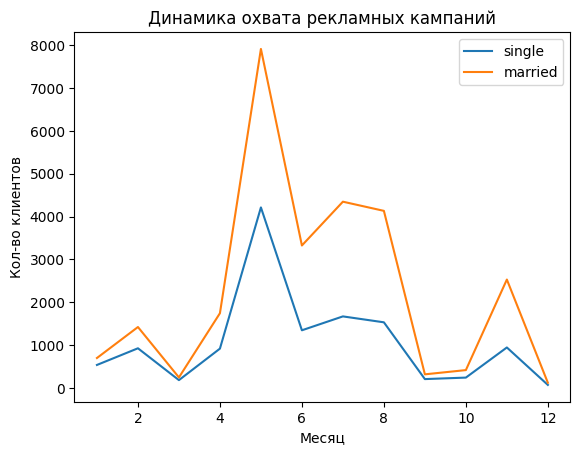

In [ ]:


plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single', 'married']);

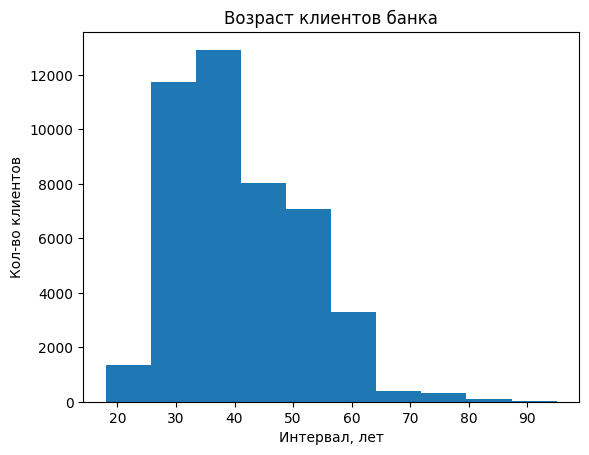

In [ ]:
plt.hist(df['age'], bins=10)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

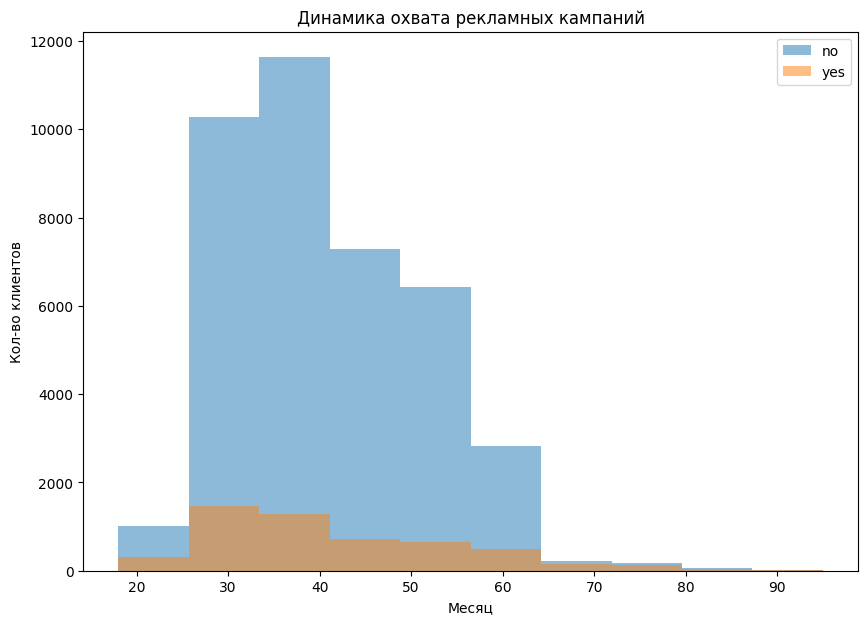

In [ ]:
#гистограмма в разрезе людей, ставших и не ставших клиентами депозита

plt.figure(figsize=(10, 7))

plt.hist(df['age'][df['y'] == 'no'], alpha=0.5, label='no')
plt.hist(df['age'][df['y'] == 'yes'], alpha=0.5, label='yes')


plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend();



In [ ]:
# Перекодируем переменную y
df['convert'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
#готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


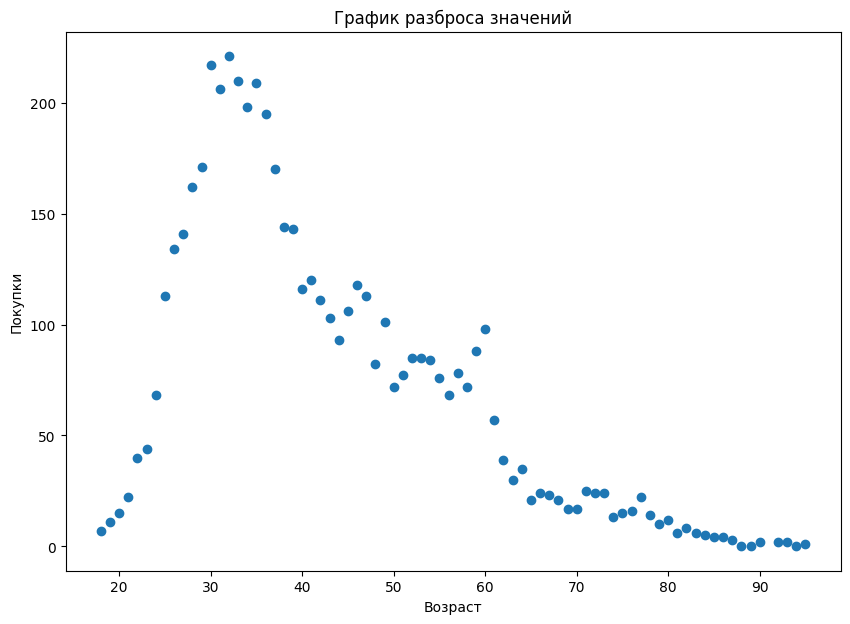

In [ ]:
#диаграмма рассеяния

plt.figure(figsize=(10, 7))
plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

In [ ]:
# Готовим данные для графика
data1 = df['duration'][df['y'] == 'yes']
data2 = df['duration'][df['y'] == 'no']


83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

In [ ]:
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

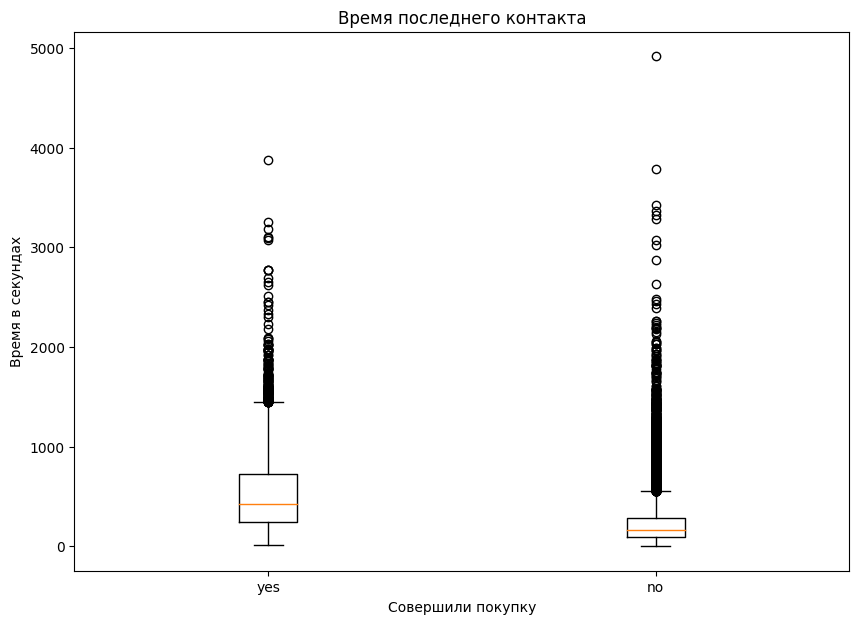

In [ ]:
#боксплот

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

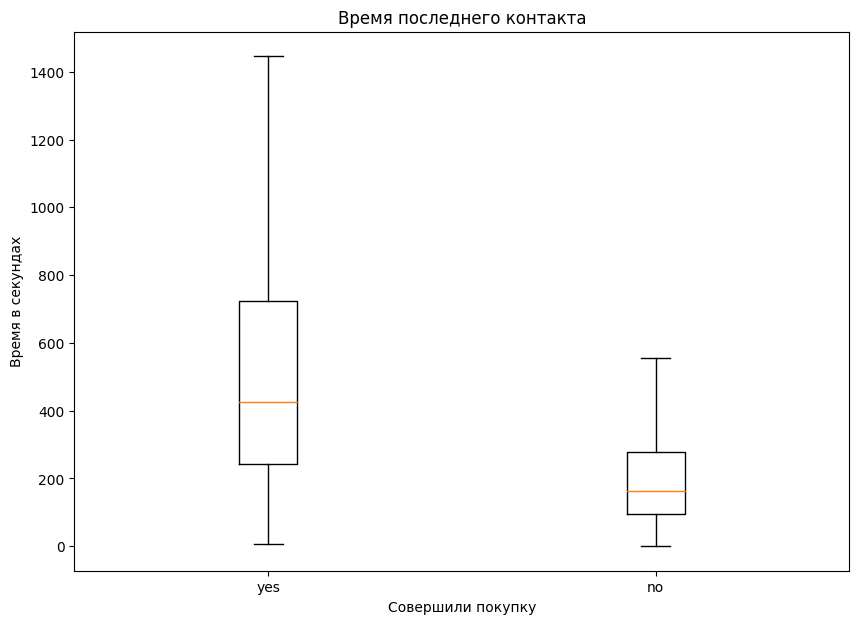

In [ ]:
#боксплот без выбросов

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

In [ ]:
data = df['job'].value_counts().reset_index()


In [ ]:
data.head(10)

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154
5,retired,2264
6,self-employed,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


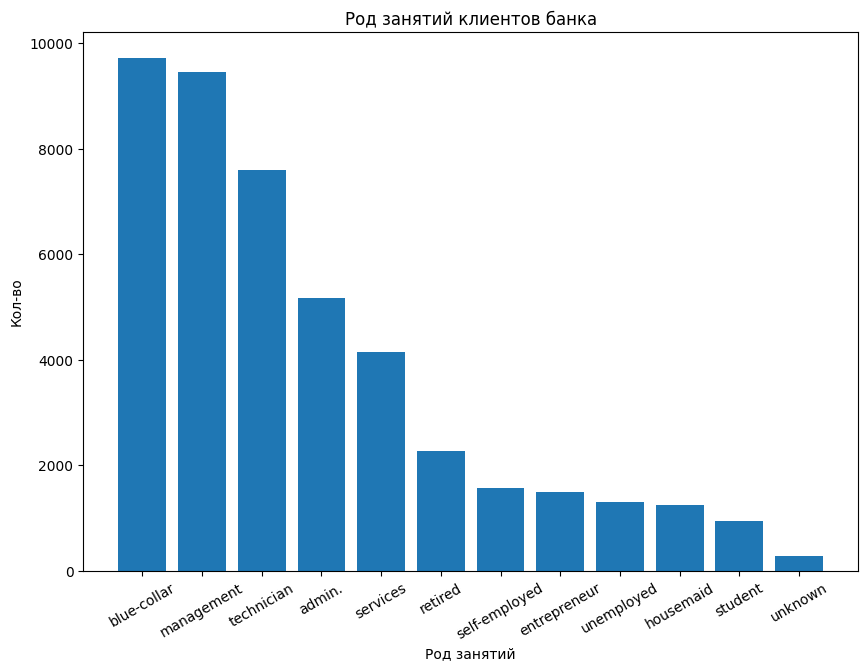

In [ ]:
#столбчатая диаграмма

plt.figure(figsize=(10, 7))

plt.bar(data['job'], data['count'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

In [ ]:
#данные для графика
data = pd.crosstab(df['job'], df['y']).reset_index().sort_values(by='no', ascending=False)


In [ ]:
data.head(10)

y,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369
5,retired,1748,516
6,self-employed,1392,187
2,entrepreneur,1364,123
3,housemaid,1131,109
10,unemployed,1101,202


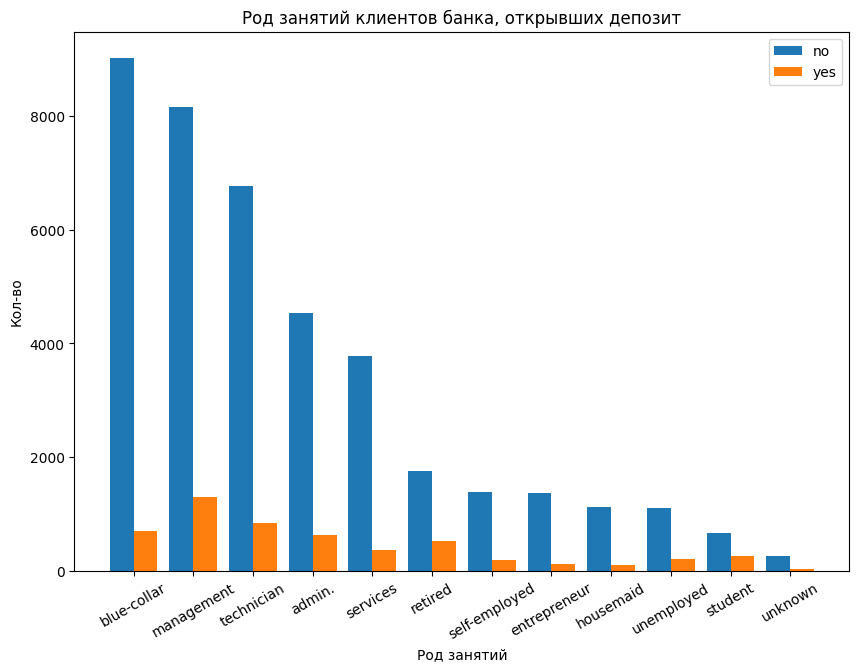

In [ ]:
#столбчатая многорядная диаграмма

plt.figure(figsize=(10, 7))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);

In [ ]:
#данные для графика
data = df['y'].value_counts()


In [ ]:
data.head(10)

y
no     39922
yes     5289
Name: count, dtype: int64

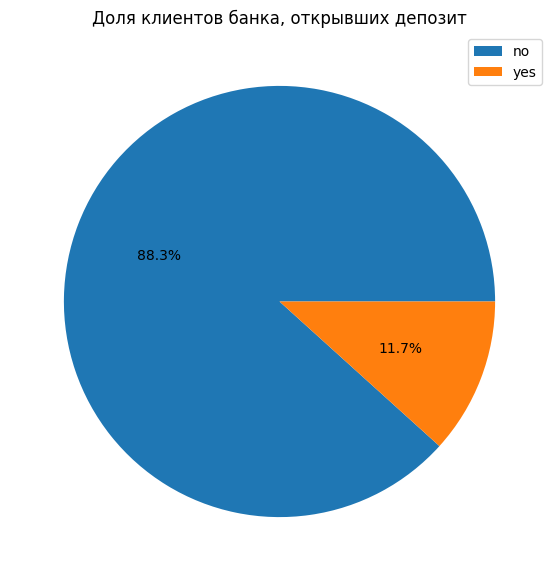

In [ ]:
#круговая диаграмма

plt.figure(figsize=(10, 7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);